In [1]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

CACHE_DIR = Path(Path(os.getenv('APP_DIR')), '.cache')
NANOHUB_CACHE = Path(CACHE_DIR, 'nanohub')
NANOHUB_METRICS_CACHE = Path(CACHE_DIR, 'nanohub_metrics')


def create_silhouette_visual(sample, kmeans: KMeans, clusters: list = [2,3,4,5]):
    fig, ax = plt.subplots(2, 2, figsize=(15,8))
    for i in clusters:
        q, mod = divmod(i, 2)

        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(sample)
        
        
def display_cluster_info(X_scaled, clusters: [] = [2,3,4,5,6,7,8,9,10]):
    km_scores= []
    km_silhouette = []
    vmeasure_score =[]
    db_score = []
    
    fig, ax = plt.subplots(5, 2, figsize=(15,8))

    for i in clusters:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X_scaled)
        preds = kmeans.predict(X_scaled)
        km_scores.append(-kmeans.score(X_scaled))
        print("Score for number of cluster(s) {}: {}".format(i,kmeans.score(X_scaled)))
        km_scores.append(-kmeans.score(X_scaled))

        silhouette = silhouette_score(X_scaled,preds)
        km_silhouette.append(silhouette)
        print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

        db = davies_bouldin_score(X_scaled,preds)
        db_score.append(db)
        print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

        display("Centroids - ")
        print(kmeans.cluster_centers_)
        
        q, mod = divmod(i, 2)
    
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(X_scaled)

        print("-"*100) 




In [2]:
df = pd.read_csv(
    Path(CACHE_DIR, 'unclassified_user_data.csv'),
    index_col=False
)

In [3]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [4]:
frequency_df = df[['user', 'job_event_days']].copy()
frequency_df['Frequency'] = frequency_df['job_event_days']

users = pd.merge(users, frequency_df, on='user')

kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Frequency']])
users['FrequencyCluster'] = kmeans.predict(users[['Frequency']])

In [5]:
display(users.groupby('FrequencyCluster')['Frequency'].describe())

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,34178.0,4.693165,3.445237,2.0,2.0,3.0,6.00,18.0
1,2154.0,31.771588,12.590953,19.0,22.0,28.0,38.00,71.0
2,200.0,111.585000,43.282905,72.0,81.0,98.5,127.25,317.0
3,6.0,570.166667,230.376576,359.0,426.5,477.5,668.00,966.0


In [6]:
users.to_csv(
    Path(CACHE_DIR, "frequency.csv"),
    index=False,
    index_label=False
)

In [7]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Frequency']])

Score for number of cluster(s) 2: -4.154690951542588
Silhouette score for number of cluster(s) 2: 0.9151897141300026
Davies Bouldin score for number of cluster(s) 2: 0.4962419260003622


'Centroids - '

[[0.00394979]
 [0.08148368]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -2.4671703378110035
Silhouette score for number of cluster(s) 3: 0.8877062297966146
Davies Bouldin score for number of cluster(s) 3: 0.47449863926685043


'Centroids - '

[[0.00349771]
 [0.05606039]
 [0.49769479]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -1.488661413199219
Silhouette score for number of cluster(s) 4: 0.8290571638572565
Davies Bouldin score for number of cluster(s) 4: 0.49636567775481977


'Centroids - '

[[0.00271535]
 [0.58938451]
 [0.0294411 ]
 [0.11072083]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -1.006379160280505
Silhouette score for number of cluster(s) 5: 0.7656625859937136
Davies Bouldin score for number of cluster(s) 5: 0.4997104039852581


'Centroids - '

[[0.0163536 ]
 [0.05487271]
 [0.00195052]
 [0.63319502]
 [0.15304366]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -0.7090211293241093
Silhouette score for number of cluster(s) 6: 0.7517349586015847
Davies Bouldin score for number of cluster(s) 6: 0.4734049171046067


'Centroids - '

[[0.01436333]
 [0.87188797]
 [0.12859777]
 [0.00180103]
 [0.39078245]
 [0.04715455]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -0.49150035259164077
Silhouette score for number of cluster(s) 7: 0.7318466752181647
Davies Bouldin score for number of cluster(s) 7: 0.4695027165855218


'Centroids - '

[[0.00162789]
 [0.39078245]
 [0.07021696]
 [0.01172831]
 [0.03234892]
 [0.15032968]
 [0.87188797]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -0.3776959397718128
Silhouette score for number of cluster(s) 8: 0.6962371714866706
Davies Bouldin score for number of cluster(s) 8: 0.48065781391742274


'Centroids - '

[[0.00124051]
 [0.07551069]
 [0.87188797]
 [0.01987997]
 [0.15140845]
 [0.00798937]
 [0.39078245]
 [0.03996951]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -0.30373289563509687
Silhouette score for number of cluster(s) 9: 0.6521018307041079
Davies Bouldin score for number of cluster(s) 9: 0.4990509612631471


'Centroids - '

[[7.22267763e-04]
 [6.22375857e-02]
 [8.71887967e-01]
 [1.61371888e-02]
 [1.78301196e-01]
 [3.38371311e-02]
 [3.90782454e-01]
 [5.41511615e-03]
 [1.09028105e-01]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -0.2497282297318458
Silhouette score for number of cluster(s) 10: 0.6605708159088582
Davies Bouldin score for number of cluster(s) 10: 0.49800867656548187


'Centroids - '

[[4.88661825e-03]
 [7.05157354e-02]
 [8.71887967e-01]
 [2.64489482e-02]
 [3.90782454e-01]
 [1.87599745e-01]
 [7.22267763e-04]
 [1.30392033e-02]
 [1.17002798e-01]
 [4.45761054e-02]]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


----------------------------------------------------------------------------------------------------


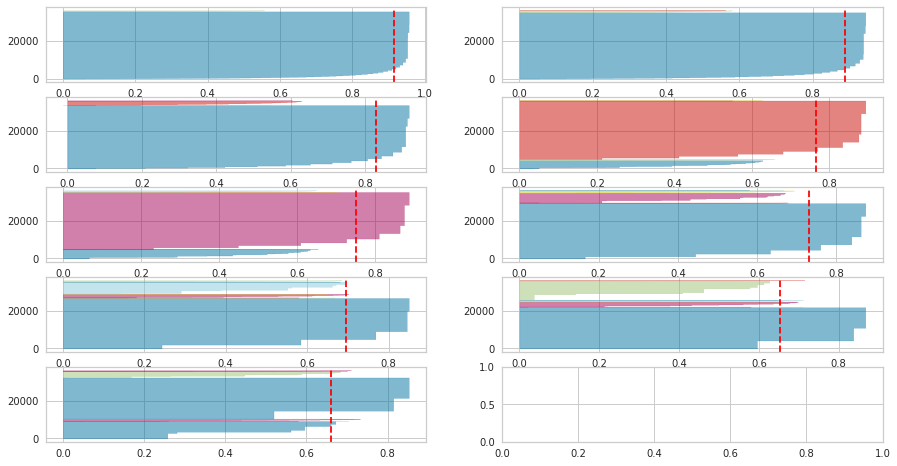

In [8]:
 display_cluster_info(X_scaled)